# 分类模型（一）

## Linear_Models
1. Perceptron
2. Ordinary Least Squares
3. ridge
4. lasso
5. logistic regression 
6. linear svm


### Perceptron
* It does not require a learning rate. 
* It is not regularized (penalized). 
* It updates its model only on mistakes. 


In [ ]:
class sklearn.linear_model.Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, n_iter=5, shuffle=True, verbose=0, eta0=1.0, 
                                       n_jobs=1, random_state=0, class_weight=None, warm_start=False)

In [ ]:
# Coding in here 
import pandas as pd 
import numpy as np 
df = pd.read_csv(u"F:/数据分析/SOTON/420/sklearn/4.0/adultTest.csv")


In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
dfNew = pd.get_dummies(data = df,columns = ["workclass","education","marital-status","occupation","relationship","race","sex","native-country"])

In [ ]:
dfNew.shape

In [ ]:
dfNew.head()

In [ ]:
dfNew['class'] = dfNew['class'].map(lambda s : s.strip(" "))

In [ ]:
dfNew.loc[dfNew['class'] == '<=50K','target'] = 0
dfNew.loc[dfNew['class'] != '<=50K','target'] = 1         
#xdata = dfNew.drop("class",axis = 1)

In [ ]:
dfNew['class'].value_counts()

In [ ]:
xdata = dfNew.drop(['class','target'],axis = 1)
ydata = dfNew['target']

In [ ]:
ydata.value_counts()

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
per = Perceptron(n_iter=20)

In [ ]:
per.fit(xdata,ydata)

In [ ]:
per.predict(xdata)

In [ ]:
per.decision_function(xdata)

In [ ]:
per.score(xdata,ydata)

### Ordinary Least Squares
LinearRegression fits a linear model with coefficients w = (w_1, ..., w_p) to minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation. Mathematically it solves a problem of the form
![ols](http://scikit-learn.org/stable/_images/math/e8e92a5482d9327d939e7a17946a8a1b98006018.png)
![ols1](http://scikit-learn.org/stable/_images/sphx_glr_plot_ols_0011.png)

In [ ]:
class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Coding in here 
lr = LinearRegression(normalize = True)

In [ ]:
lr.fit(xdata,ydata)

In [ ]:
lr.predict(xdata)

In [ ]:
ff = pd.read_csv(u"F:/数据分析/SOTON/420/sklearn/4.0/forestfires.csv")

In [ ]:
ff.dtypes

In [ ]:
ff.head()

In [ ]:
ffNew = pd.get_dummies(data = ff,columns = ['month','day'])

In [ ]:
ffNew.head()

In [ ]:
ffNew.dtypes

In [ ]:
xdata_ff = ffNew.drop("area",axis = 1)
ydata_ff = ffNew['area']

In [ ]:
lr.fit(xdata_ff,ydata_ff)

In [ ]:
lr.predict(xdata_ff)

In [ ]:
lr.score(xdata_ff,ydata_ff)

In [ ]:
lr.coef_

In [ ]:
help(lr.score)

### Ridge VS Lasso
#### *Ridge*
Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,
![ridge](http://scikit-learn.org/stable/_images/math/48dbdad39c89539c714a825c0c0d5524eb526851.png)
Here, \alpha \geq 0 is a complexity parameter that controls the amount of shrinkage: the larger the value of \alpha, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.
#### *Lasso*
The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent. For this reason, the Lasso and its variants are fundamental to the field of compressed sensing. Under certain conditions, it can recover the exact set of non-zero weights
![Lasso](http://scikit-learn.org/stable/_images/math/07c30d8004d4406105b2547be4f3050048531656.png)

In [ ]:
# LassoCV
class sklearn.linear_model.LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', 
                                    max_iter=1000, tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=1, positive=False, 
                                    random_state=None, selection='cyclic')

In [ ]:
# RidgeCV
class sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, 
                                   store_cv_values=False)

In [ ]:
# RidgeClassifierCV
class sklearn.linear_model.RidgeClassifierCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, 
                                             scoring=None, cv=None, class_weight=None)

In [ ]:
ydata.value_counts()

In [ ]:
#Coding in here 
from sklearn.cross_validation import StratifiedKFold
sf =StratifiedKFold(ydata,n_folds=5)

In [ ]:
from  sklearn.linear_model import LassoCV
lasso = LassoCV( alphas = np.array([0.01,1,0.001,5]),normalize = False)

In [ ]:
lasso.fit(xdata_ff,ydata_ff)

In [ ]:
lasso.alpha_

In [ ]:
lasso.coef_

In [ ]:
lasso.score(xdata_ff,ydata_ff)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
xdata_ff_ss = ss.fit_transform(xdata_ff)

In [ ]:
lasso.fit(xdata_ff_ss,ydata_ff)

In [ ]:
lasso.coef_

In [ ]:
lasso.alpha_

In [ ]:
lasso.score(xdata_ff_ss,ydata_ff)

In [ ]:
from  sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas=(0.1, 1.0, 10.0))

In [ ]:
ridge.fit(xdata_ff,ydata_ff)

In [ ]:
ridge.coef_

In [ ]:
ridge.score(xdata_ff,ydata_ff)

In [ ]:
from  sklearn.linear_model import RidgeClassifierCV
rc = RidgeClassifierCV(alphas=(0.1, 1.0, 10.0))

In [ ]:
rc.fit(xdata,ydata)

In [ ]:
rc.alpha_

In [ ]:
rc.score(xdata,ydata)

### Logistic Regression
As an optimization problem, binary class L2 penalized logistic regression minimizes the following cost function:
![l2](http://scikit-learn.org/stable/_images/math/760c999ccbc78b72d2a91186ba55ce37f0d2cf37.png)
Similarly, L1 regularized logistic regression solves the following optimization problem
![l1](http://scikit-learn.org/stable/_images/math/6a0bcf21baaeb0c2b879ab74fe333c0aab0d6ae6.png)

#### *Attentions*
*You shoud scale both train and test data. Thinking why and how?*

In [ ]:
class sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
                                              class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', 
                                              verbose=0, warm_start=False, n_jobs=1)

In [ ]:
xdata.head()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 0.01,max_iter=200)

In [ ]:
lr.fit(xdata,ydata)

In [ ]:
lr.predict_proba(xdata)

In [ ]:
lr.score(xdata,ydata)

In [ ]:
ss = StandardScaler()
xdata_ss = ss.fit_transform(xdata)

In [ ]:
lr.fit(xdata_ss,ydata)

In [ ]:
lr.score(xdata_ss,ydata)

### Stochastic Gradient Descent
* The advantages of Stochastic Gradient Descent are:

        1.Efficiency.
        2.Ease of implementation (lots of opportunities for code tuning).

* The disadvantages of Stochastic Gradient Descent include:

        1.SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
        2.SGD is sensitive to feature scaling.

* For best results using the default learning rate schedule, the data should have zero mean and unit variance.

#### *Tips on Practical Use*

1. Stochastic Gradient Descent is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results. This can be easily done using StandardScaler.If your attributes have an intrinsic scale (e.g. word frequencies or indicator features) scaling is not needed.

2. Finding a reasonable regularization term \alpha is best done using GridSearchCV, usually in the range 10.0**-np.arange(1,7).

3. Empirically, we found that SGD converges after observing approx. 10^6 training samples. Thus, a reasonable first guess for the number of iterations is n_iter = np.ceil(10**6 / n), where n is the size of the training set.

4. If you apply SGD to features extracted using PCA we found that it is often wise to scale the feature values by some constant c such that the average L2 norm of the training data equals one.

5. We found that Averaged SGD works best with a larger number of features and a higher eta0


#### Tips中文版
1. 数据需要标准或者归一化
2. 选择一个合理的alpha
3. 根据经验，n_iter = np.ceil(10**6 / n)就能收敛
4. 忽视
5. 大量的特征与高的eta，SGD能够表现的不错

In [ ]:
class sklearn.linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, n_iter=5, 
                                         shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate='optimal', 
                                         eta0=0.0, power_t=0.5, class_weight=None, warm_start=False, average=False)

In [ ]:
#Coding in here 

### Linear support vector machine
![SVM](http://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_0011.png)

**The advantages of support vector machines are:**
1. Effective in high dimensional spaces.
2. Still effective in cases where number of dimensions is greater than the number of samples.
3. Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
4. Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

**The disadvantages of support vector machines include:**
1. If the number of features is much greater than the number of samples, the method is likely to give poor performances.
2. SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

In [ ]:
# Linear-svc
class sklearn.svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', 
                            fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, 
                            max_iter=1000)

# svc
class sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, 
                      tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, 
                      decision_function_shape=None, random_state=None)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = "linear")

In [ ]:
svc.fit(xdata_ss,ydata)

In [ ]:
svc.score(xdata_ss,ydata)

In [ ]:
ydata.value_counts()

**Scores and probabilities**

The SVC method decision_function gives per-class scores for each sample (or a single score per sample in the binary case). When the constructor option probability is set to True, class membership probability estimates (from the methods predict_proba and predict_log_proba) are enabled. **_In the binary case, the probabilities are calibrated using Platt scaling: logistic regression on the SVM’s scores, fit by an additional cross-validation on the training data._** In the multiclass case, this is extended as per Wu et al. (2004).

Needless to say, the cross-validation involved in Platt scaling is an expensive operation for large datasets. In addition, the probability estimates may be inconsistent with the scores, in the sense that the “argmax” of the scores may not be the argmax of the probabilities. (E.g., in binary classification, a sample may be labeled by predict as belonging to a class that has probability <½ according to predict_proba.) Platt’s method is also known to have theoretical issues. If confidence scores are required, but these do not have to be probabilities, then it is advisable to set probability=False and use decision_function instead of predict_proba.

**Unbalanced problems**

In problems where it is desired to give more importance to certain classes or certain individual samples keywords **class_weight** and **sample_weight** can be used.

SVC (but not NuSVC) implement a keyword class_weight in the fit method. It’s a dictionary of the form {class_label : value}, where value is a floating point number > 0 that sets the parameter C of class class_label to C * value.

Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

![image](http://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_unbalanced_0011.png)


SVC, NuSVC, SVR, NuSVR and OneClassSVM implement also weights for individual samples in method fit through keyword sample_weight. Similar to class_weight, these set the parameter C for the i-th example to C * sample_weight[i].

![image1](http://scikit-learn.org/stable/_images/sphx_glr_plot_weighted_samples_001.png)

# 分类模型（二）

## Non Linear_Models
1. kernel support vector machine
2. Nearest Neighbors
3. *ensemble models*
4. *xgboost*
5. *lightGBM*

### kernel support vector machine



When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

Proper choice of C and gamma is critical to the SVM’s performance. One is advised to use sklearn.model_selection.GridSearchCV with C and gamma spaced exponentially far apart to choose good values.

[RBF parameters example](http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py)


![image2](http://scikit-learn.org/stable/_images/sphx_glr_plot_rbf_parameters_001.png)

Small C makes the cost of misclassificaiton low ("soft margin"), thus allowing more of them for the sake of wider "cushion".

Large C makes the cost of misclassification high ('hard margin"), thus forcing the algorithm to explain the input data stricter and potentially overfit.

So a small gamma will give you low bias and high variance while a large gamma will give you higher bias and low variance.


In [ ]:
from sklearn.svm import SVC

In [ ]:
# svc
class sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, 
                      tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, 
                      decision_function_shape=None, random_state=None)

Populating the interactive namespace from numpy and matplotlib


G:\python\anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


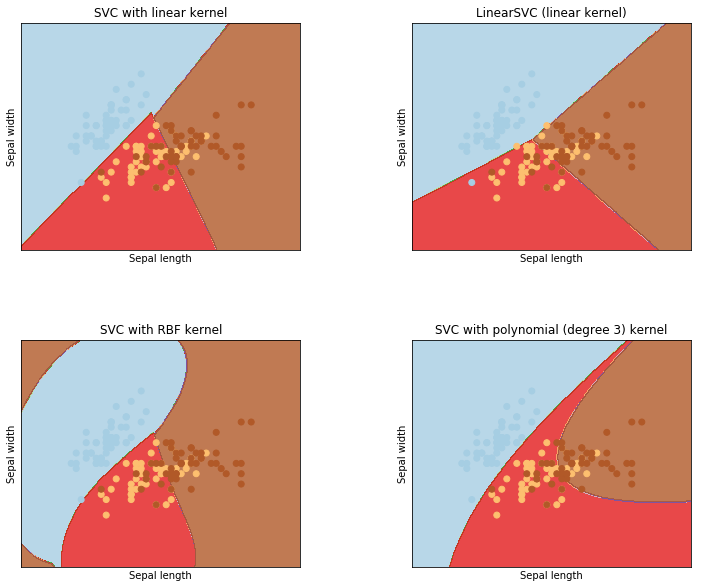

In [109]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 10)

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

**Practical tips of svm**

1.        Avoiding data copy: For SVC, SVR, NuSVC and NuSVR, if the data passed to certain methods is not C-ordered contiguous, and double precision, it will be copied before calling the underlying C implementation. You can check whether a given numpy array is C-contiguous by inspecting its flags attribute.

2.       For LinearSVC (and LogisticRegression) any input passed as a numpy array will be copied and converted to the liblinear internal sparse data representation (double precision floats and int32 indices of non-zero components). If you want to fit a large-scale linear classifier without copying a dense numpy C-contiguous double precision array as input we suggest to use the SGDClassifier class instead. The objective function can be configured to be almost the same as the LinearSVC model.

3.        Kernel cache size: For SVC, SVR, nuSVC and NuSVR, the size of the kernel cache has a strong impact on run times for larger problems. If you have enough RAM available, it is recommended to set cache_size to a higher value than the default of 200(MB), such as 500(MB) or 1000(MB).

4.        Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it. It corresponds to regularize more the estimation.

5.        Support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results. See section Preprocessing data for more details on scaling and normalization.

6.        Parameter nu in NuSVC/OneClassSVM/NuSVR approximates the fraction of training errors and support vectors.

7.        In SVC, if data for classification are unbalanced (e.g. many positive and few negative), set class_weight='balanced' and/or try different penalty parameters C.

8.        The underlying LinearSVC implementation uses a random number generator to select features when fitting the model. It is thus not uncommon, to have slightly different results for the same input data. If that happens, try with a smaller tol parameter.

9.        Using L1 penalization as provided by LinearSVC(loss='l2', penalty='l1', dual=False) yields a sparse solution, i.e. only a subset of feature weights is different from zero and contribute to the decision function. Increasing C yields a more complex model (more feature are selected). The C value that yields a “null” model (all weights equal to zero) can be calculated using l1_min_c.



### Ensemble Models

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Two families of ensemble methods are usually distinguished:
In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.
Examples: Bagging methods, Forests of randomized trees, ...

By contrast, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.
Examples: AdaBoost, Gradient Tree Boosting, ...

#### **Random Forest**

In random forests (see RandomForestClassifier and RandomForestRegressor classes), each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. In addition, when splitting a node during the construction of the tree, the split that is chosen is no longer the best split among all features. Instead, the split that is picked is the best split among a random subset of the features. As a result of this randomness, the bias of the forest usually slightly increases (with respect to the bias of a single non-random tree) but, due to averaging, its variance also decreases, usually more than compensating for the increase in bias, hence yielding an overall better model.

** Parameters**
1. n_estimators
2. max_features
3. max_depth
4. min_samples_split
5. bootstrap

In [ ]:
class sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                              min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07,
                                              bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
                                              class_weight=None)

In [110]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(verbose = 1)

In [111]:
rf.fit(xdata,ydata)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=1, warm_start=False)

In [112]:
rf.score(xdata,ydata)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.98710113325757809

In [113]:
rf.predict_proba(xdata)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


array([[ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       ..., 
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 0.2,  0.8]])

#### **AdaBoost**

The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consist of applying weights w_1, w_2, ..., w_N to each of the training samples. Initially, those weights are all set to w_i = 1/N, so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence

[adaboost为什么不容易过拟合呢](https://www.zhihu.com/question/41047671)

**Parameters**
1. n_estimators
2. learning_rate
3. max_depth
4. min_samples_leaf

In [ ]:
class sklearn.ensemble.AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)

In [114]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [115]:
ada.fit(xdata,ydata)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [116]:
ada.score(xdata,ydata)

0.86124504775651856

#### **Gradient boosting **
[Wikipedia Gradient Boosting](https://en.wikipedia.org/wiki/Gradient_boosting)

[为什么在实际的 kaggle 比赛中 gbdt 和 random forest 效果非常好？](https://www.zhihu.com/question/51818176)

In [ ]:
class sklearn.ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse',
                                                  min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, 
                                                  min_impurity_split=1e-07, init=None, random_state=None, max_features=None, verbose=0, 
                                                  max_leaf_nodes=None, warm_start=False, presort='auto')

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
gsc = GradientBoostingClassifier()

In [118]:
gsc.fit(xdata,ydata)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [119]:
gsc.score(xdata,ydata)

0.86904579097693557

#### xgboost
[XGBoost: A Scalable Tree Boosting System](https://arxiv.org/abs/1603.02754)

[XGBoost Github](https://github.com/dmlc/xgboost)

Building on Ubuntu/Debian
1. git clone --recursive https://github.com/dmlc/xgboost
2. cd xgboost
3. make -j4

Building on OSX
1. git clone --recursive https://github.com/dmlc/xgboost
2. cd xgboost
3. cp make/minimum.mk ./config.mk
4. make -j4

python setup.py install


OR 

pip install xgboost

[机器学习算法中GBDT和XGBOOST的区别有哪些](https://www.zhihu.com/question/41354392)

In [ ]:
class xgboost.XGBClassifier(self, max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, objective='binary:logistic', nthread=-1, 
                            gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, base_score=0.5, seed=0)

In [ ]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(xdata,ydata)
xgb.predict_proba(xdata)

#### **lightGBM**

[LightGBM Github](https://github.com/Microsoft/LightGBM)


LightGBM is a gradient boosting framework that is using tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

* Fast training speed and high efficiency
* Lower memory usage
* Better accuracy
* Parallel learning supported
* Capability of handling large scale data

**Optimization in speed and memory usage**

Many boosting tools use pre-sorted based algorithms[1][2](e.g. default algorithm in xgboost) for decision tree learning. It is a simple solution, but not easy to optimize.

LightGBM uses the histogram based algorithms[3][4][5], which bucketing continuous feature(attribute) values into discrete bins, to speed up training procedure and reduce memory usage. Following are advantages for histogram based algorithms:

1. Reduce calculation cost of split gain
Pre-sorted based algorithms need O(#data) times calculation
Histogram based algorithms only need to calculate O(#bins) times, and #bins is far smaller than #data
It still needs O(#data) times to construct histogram, which only contain sum-up operation

2. Only need to split data one time after finding best split point
Pre-sorted based algorithms need to split data O(#features) times (since different features access data in different order)

3. Use histogram subtraction for further speed-up
To get one leaf's histograms in a binary tree, can use the histogram subtraction of its parent and its neighbor
So it only need to construct histograms for one leaf (with smaller #data than its neighbor), then can get histograms of its neighbor by histogram subtraction with small cost( O(#bins) )

4. Reduce Memory usage
Can replace continuous values to discrete bins. If #bins is small, can use small data type, e.g. uint8_t, to store training data
No need to store additional information for pre-sorting feature values

5. Reduce communication cost for parallel learning

[More Details](https://github.com/Microsoft/LightGBM/wiki)

For linux, by running following command in this folder:

./lightgbm config=train.conf

[train.conf](https://github.com/Microsoft/LightGBM/blob/master/examples/binary_classification/train.conf)

Prediction

./lightgbm config=predict.conf

In [ ]:
import subprocess
subprocess.call(['./lightgbm','config=train.conf'])